In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("corporate_openwork.csv")
names = df["企業名"].tolist()
keywords = df["URL"].tolist()

view_list = ["jsAveTotal","jsAveSatisfy","jsAveSpirit","jsAveAiry","jsAveTeam","jsAveJunior","jsAveSenior","jsAveLaw","jsAveAssess","jsAveOvertime","jsAveWithpay"]
view_list_jpn = ["総合評価","待遇面の満足度","社員の士気","風通しの良さ","社員の相互尊重","20代成長環境","人材の長期育成","法令順守意識","人事評価の適正感","残業時間（月間）","有給休暇消化率"]

In [7]:
df_other = pd.DataFrame()
for corp_name in names[1:]:
    print(corp_name)
    open_csv = corp_name+"_openwork.csv"
    df = pd.read_csv(open_csv,encoding="shift-jis")
    df_other = pd.concat([df_other,df],axis=0)
df_other.to_csv("other_openwork.csv",encoding="shift-jis")
df_other = df_other.drop(df_other.columns[:1],axis=1)
df_other

ブレインパッド
システムズ・デザイン
澪標アナリティクス
TDSE
シナモン


,総合評価,待遇面の満足度,社員の士気,風通しの良さ,社員の相互尊重,20代成長環境,人材の長期育成,法令順守意識,人事評価の適正感,残業時間（月間）,有給休暇消化率
0,1,1,1,1,1,2,1,1,1,0,0
1,1,1,1,1,1,2,1,1,1,0,0
2,2,1,1,1,1,2,1,1,1,0,0
3,2,1,2,2,1,2,1,2,1,0,0
4,2,2,2,2,1,2,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3,2,2,3,4,2,3,2,3,2,0,80
4,3,3,3,4,2,3,2,3,4,20,80
5,3,3,3,4,2,4,3,4,4,20,80
6,3,3,3,4,3,5,3,5,5,40,80


In [9]:
df_d4c = pd.read_csv("D4cプレミアム_openwork.csv",encoding="shift-jis")
df_d4c = df_d4c.drop(df_d4c.columns[:1],axis=1)
df_d4c

,総合評価,待遇面の満足度,社員の士気,風通しの良さ,社員の相互尊重,20代成長環境,人材の長期育成,法令順守意識,人事評価の適正感,残業時間（月間）,有給休暇消化率
0,2,2,2,2,1,1,1,2,2,0,0
1,2,2,2,2,2,1,1,2,2,0,0
2,2,2,2,2,2,2,1,2,2,0,0
3,2,2,2,2,2,2,1,2,2,0,0
4,2,2,2,2,2,3,1,3,2,0,20
5,2,2,2,3,3,3,2,3,2,0,40
6,2,3,3,3,3,3,2,3,3,0,40
7,2,3,3,3,3,3,2,3,3,0,60
8,2,3,3,3,3,3,2,4,3,20,60
9,3,3,3,3,3,4,2,4,3,20,60


In [11]:
for item in view_list_jpn:
    len0 = np.array(df_d4c[item].dropna())
    len1 = np.array(df_other[item].dropna())
    t,p = stats.ttest_ind(len0,len1, equal_var=False)
    #今回は等分散性が示せないため、ウェルチの検定を利用。（equal_var=False）
    if p <0.05:
        print("〇"+item + "："+str(p))
        distinct = np.mean(len0) - np.mean(len1)
        print("D4c："+str(np.mean(len0)))
        print("他社："+str(np.mean(len1)))
        print("D4cの方が "+str(distinct)+" 大きい")
    else:
        print("〇"+item+"は同じと言える")

〇総合評価は同じと言える
〇待遇面の満足度は同じと言える
〇社員の士気は同じと言える
〇風通しの良さは同じと言える
〇社員の相互尊重は同じと言える
〇20代成長環境は同じと言える
〇人材の長期育成は同じと言える
〇法令順守意識は同じと言える
〇人事評価の適正感は同じと言える
〇残業時間（月間）：0.0035862960700923535
D4c：13.333333333333334
他社：24.86111111111111
D4cの方が -11.527777777777777 大きい
〇有給休暇消化率は同じと言える


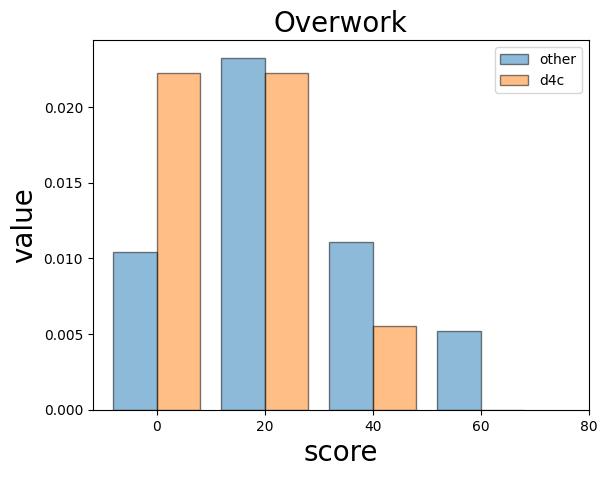

In [13]:
column = "残業時間（月間）"

other = df_other[column]
d4c = df_d4c[column]

plt.xlabel("score",fontsize=20)
plt.ylabel("value",fontsize=20)
plt.title("Overwork", fontsize=20)

bins=range(0,100,20)
plt.hist([other,d4c],bins,ec="black",label=["other","d4c"], alpha = 0.5, density=True,align="left")

plt.xticks(np.arange(0,100,20))

plt.legend()
plt.show()